## Multinomial Naive Bayes

**Aim :** Assuming a set of documents that need to be classified, use the naïve Bayesian Classifier model to perform this task.  Built-in Java classes/API can be used to write the program. Calculate the accuracy, precision, and recall for your data set.

---

### A. Steps to preprocess documents:

1. Document refers to Tweets in this program.
2. for getting word Vector first we import CountVectorizer.
3. Fit the training set in it and transform training set into word vector
4. Then transform test vector using same transformer

### B. Algorithm

Bayes’ theorem :



where, y is class variable and X is a dependent feature vector (of size n) where:


<br>

The parameters $\theta_y$ is estimated by a smoothed version of maximum likelihood, i.e. relative frequency counting:

$$
\hat{\theta}_{yi} = \frac{ N_{yi} + \alpha}{N_y + \alpha n}
$$


where $N_{yi} = \sum_{x \in T} x_i$ is the number of times feature $i$ appears in a sample of class $y$ in the training set $T$ and ,$N_{y} = \sum_{i=1}^{n} N_{yi}$ and is the total count of all features for class $y$.


Setting $\alpha = 1$ is called Laplace smoothing, while $\alpha < 1$  is called Lidstone smoothing.

### 1. Import all package and read Data

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import plot_confusion_matrix, classification_report, accuracy_score

In [2]:
df = pd.read_csv("data/train.csv")
df.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


### 2. Split data in train and test set

In [3]:
X = df["tweet"]
Y = df["label"]
X_train, X_test, y_train, y_test = train_test_split(X,Y)

### 3. Transform documents to word vector

In [4]:
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)  
X_test_vec = vectorizer.transform(X_test) 

In [5]:
X_train_vec

<3363x9275 sparse matrix of type '<class 'numpy.int64'>'
	with 40346 stored elements in Compressed Sparse Row format>

### 4. Train Multinomial Naive Bayes model

In [6]:
mnb = MultinomialNB()
mnb.fit(X = X_train_vec,y=y_train)

MultinomialNB()

### 5. Predict and Check Accuracy

In [7]:
y_pred = mnb.predict(X_test_vec)

Accuracy of Model  = 0.8822479928635147

Classification Report :
              precision    recall  f1-score   support

           0       0.93      0.83      0.88       585
           1       0.84      0.93      0.88       536

    accuracy                           0.88      1121
   macro avg       0.89      0.88      0.88      1121
weighted avg       0.89      0.88      0.88      1121

Confusion Metrix: 


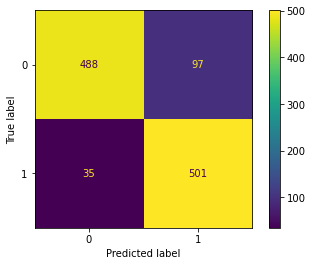

In [8]:
print(f'Accuracy of Model  = {accuracy_score(y_test,y_pred)}\n')

#print classification report
print("Classification Report :")
print(classification_report(y_test,y_pred))

#plot confusion metrix
print("Confusion Metrix: ")
plot_confusion_matrix(mnb,X_test_vec,y_test);

